In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
from scipy.signal import savgol_filter
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
SPAN = 100
WINDOW_LENGTH = 51
POLY_ORDER = 8

def calculateAverageNegativePerDay(dataframe):
    
    dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
    negative_per_day = dataframe.groupby(['created_at_day']).agg({'NEG':'sum'}).reset_index()
    tweets_per_day = (dataframe.groupby(['created_at_day'])['tweet'].count()).to_frame('tweets_per_day')
    
    average_negative_per_day = tweets_per_day.merge(negative_per_day, how='inner', on='created_at_day')
    average_negative_per_day['average_negative_per_day'] = np.round((average_negative_per_day['NEG']/ average_negative_per_day['tweets_per_day']), 2)
    
    return average_negative_per_day

In [46]:
INFLUENCERS_PATH = '../../data/covid/con_sentimientos/influencers/'
MEDIA_PATH = '../../data/covid/con_sentimientos/prensa_escrita/'
TELEVISION_PATH = '../../data/covid/con_sentimientos/television/'

user_info_df = pd.read_csv('../../data/covid/user_info_updated.csv')


In [93]:
influencers_avg_negative_per_day_df = pd.DataFrame()

# todos los influencers
imprimir = []
imprimir.append("****INFLUENCERS****")
for file in glob.glob(INFLUENCERS_PATH+'/*.csv'):
    user_df = pd.read_csv(file)
   
    username = user_df['username'].unique()[0]
    
    
    # Calculate average engagement per day & it's Exponential Moving Average
    pre_user_avg_negative_per_day = calculateAverageNegativePerDay(user_df[user_df['created_at'] < '2019-10-18T00:00:00Z'])
    pre_user_avg_negative_per_day['EMA']= pre_user_avg_negative_per_day.iloc[:,3].ewm(span=SPAN, adjust=False).mean()
    pre_user_avg_negative_per_day['user'] = username  
    
    #  Calculate z-score & Remove outliers
    pre_user_avg_negative_per_day['zscore'] = stats.zscore(pre_user_avg_negative_per_day['EMA'])

    # Curve Smoothing
    pre_user_avg_negative_per_day['EMA:Degree8'] = savgol_filter(pre_user_avg_negative_per_day['EMA'], WINDOW_LENGTH, POLY_ORDER)
    
    
    # Calculate average engagement per day & it's Exponential Moving Average
    post_user_avg_negative_per_day = calculateAverageNegativePerDay(user_df[user_df['created_at'] > '2019-10-18T00:00:00Z'])
    post_user_avg_negative_per_day['EMA']= post_user_avg_negative_per_day.iloc[:,3].ewm(span=SPAN, adjust=False).mean()
    post_user_avg_negative_per_day['user'] = username  
    
    #  Calculate z-score & Remove outliers
    post_user_avg_negative_per_day['zscore'] = stats.zscore(post_user_avg_negative_per_day['EMA'])

    # Curve Smoothing
    post_user_avg_negative_per_day['EMA:Degree8'] = savgol_filter(post_user_avg_negative_per_day['EMA'], WINDOW_LENGTH, POLY_ORDER)
    
    
    imprimir.append(str(username+' pre:' + str(round(pre_user_avg_negative_per_day['EMA:Degree8'].mean(),3))+ ' post:'+ str(round(post_user_avg_negative_per_day['EMA:Degree8'].mean(),3) )))
    # Combine all topics
    
    user_avg_negative_per_day = pd.concat([pre_user_avg_negative_per_day, post_user_avg_negative_per_day], ignore_index = True)
    
    influencers_avg_negative_per_day_df = influencers_avg_negative_per_day_df.append(user_avg_negative_per_day, ignore_index=True, sort=False)

C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1343070179.py:41: FutureWarning: 

C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1343070179.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  influencers_avg_negative_per_day_df = influencers_avg_negative_per_day_df.append(user_avg_negative_per_day, ignore_index=True, sort=False)
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [94]:
prensa_avg_negative_per_day_df = pd.DataFrame()

imprimir.append("****PRENSA Y RADIO****")
for file in glob.glob(MEDIA_PATH+'/*.csv'):
    user_df = pd.read_csv(file)
   
    username = user_df['username'].unique()[0]
        
    if username == "Tele13_Radio":
        continue    
    
    # Calculate average engagement per day & it's Exponential Moving Average
    pre_user_avg_negative_per_day = calculateAverageNegativePerDay(user_df[user_df['created_at'] < '2019-10-18T00:00:00Z'])
    pre_user_avg_negative_per_day['EMA']= pre_user_avg_negative_per_day.iloc[:,3].ewm(span=SPAN, adjust=False).mean()
    pre_user_avg_negative_per_day['user'] = username  
    
    #  Calculate z-score & Remove outliers
    pre_user_avg_negative_per_day['zscore'] = stats.zscore(pre_user_avg_negative_per_day['EMA'])

    # Curve Smoothing
    pre_user_avg_negative_per_day['EMA:Degree8'] = savgol_filter(pre_user_avg_negative_per_day['EMA'], WINDOW_LENGTH, POLY_ORDER)
    
    
    # Calculate average engagement per day & it's Exponential Moving Average
    post_user_avg_negative_per_day = calculateAverageNegativePerDay(user_df[user_df['created_at'] > '2019-10-18T00:00:00Z'])
    post_user_avg_negative_per_day['EMA']= post_user_avg_negative_per_day.iloc[:,3].ewm(span=SPAN, adjust=False).mean()
    post_user_avg_negative_per_day['user'] = username  
    
    #  Calculate z-score & Remove outliers
    post_user_avg_negative_per_day['zscore'] = stats.zscore(post_user_avg_negative_per_day['EMA'])

    # Curve Smoothing
    post_user_avg_negative_per_day['EMA:Degree8'] = savgol_filter(post_user_avg_negative_per_day['EMA'], WINDOW_LENGTH, POLY_ORDER)
    
    
    imprimir.append(str(username+' pre:' + str(round(pre_user_avg_negative_per_day['EMA:Degree8'].mean(),3))+ ' post:'+ str(round(post_user_avg_negative_per_day['EMA:Degree8'].mean(),3) )))
    # Combine all topics
    
    user_avg_negative_per_day = pd.concat([pre_user_avg_negative_per_day, post_user_avg_negative_per_day], ignore_index = True)
    
    prensa_avg_negative_per_day_df = prensa_avg_negative_per_day_df.append(user_avg_negative_per_day, ignore_index=True, sort=False)

C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\159311463.py:41: FutureWarning: T

C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\159311463.py:41: FutureWarning: T

In [95]:
television_avg_negative_per_day_df = pd.DataFrame()

imprimir.append("****TELEVISIÓN****")
for file in glob.glob(TELEVISION_PATH+'/*.csv'):
    user_df = pd.read_csv(file)
   
    username = user_df['username'].unique()[0]
    
    if username == "CNNChile":
        continue
    
    # Calculate average engagement per day & it's Exponential Moving Average
    pre_user_avg_negative_per_day = calculateAverageNegativePerDay(user_df[user_df['created_at'] < '2019-10-18T00:00:00Z'])
    pre_user_avg_negative_per_day['EMA']= pre_user_avg_negative_per_day.iloc[:,3].ewm(span=SPAN, adjust=False).mean()
    pre_user_avg_negative_per_day['user'] = username  
    
    #  Calculate z-score & Remove outliers
    pre_user_avg_negative_per_day['zscore'] = stats.zscore(pre_user_avg_negative_per_day['EMA'])

    # Curve Smoothing
    pre_user_avg_negative_per_day['EMA:Degree8'] = savgol_filter(pre_user_avg_negative_per_day['EMA'], WINDOW_LENGTH, POLY_ORDER)
    
    
    # Calculate average engagement per day & it's Exponential Moving Average
    post_user_avg_negative_per_day = calculateAverageNegativePerDay(user_df[user_df['created_at'] > '2019-10-18T00:00:00Z'])
    post_user_avg_negative_per_day['EMA']= post_user_avg_negative_per_day.iloc[:,3].ewm(span=SPAN, adjust=False).mean()
    post_user_avg_negative_per_day['user'] = username  
    
    #  Calculate z-score & Remove outliers
    post_user_avg_negative_per_day['zscore'] = stats.zscore(post_user_avg_negative_per_day['EMA'])

    # Curve Smoothing
    post_user_avg_negative_per_day['EMA:Degree8'] = savgol_filter(post_user_avg_negative_per_day['EMA'], WINDOW_LENGTH, POLY_ORDER)
    
    
    imprimir.append(str(username+' pre:' + str(round(pre_user_avg_negative_per_day['EMA:Degree8'].mean(),3))+ ' post:'+ str(round(post_user_avg_negative_per_day['EMA:Degree8'].mean(),3) )))
    # Combine all topics
    
    user_avg_negative_per_day = pd.concat([pre_user_avg_negative_per_day, post_user_avg_negative_per_day], ignore_index = True)
    
    television_avg_negative_per_day_df = television_avg_negative_per_day_df.append(user_avg_negative_per_day, ignore_index=True, sort=False)

C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1267293234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['created_at_day'] = pd.to_datetime(dataframe['created_at'].str[:10])
C:\Users\Francisco Alessandri\AppData\Local\Temp\ipykernel_23728\1606114575.py:41: FutureWarning: 

In [92]:
for texto in imprimir:
    print(texto)
    print("*"*50)

****INFLUENCERS****
**************************************************
andres20ad pre:0.774 post:0.728
**************************************************
Chileokulto pre:0.536 post:0.53
**************************************************
csantander23 pre:0.3 post:0.52
**************************************************
El_Ciudadano pre:0.421 post:0.421
**************************************************
FelipeParadaM pre:0.483 post:0.49
**************************************************
GAMBA_CL pre:0.809 post:0.789
**************************************************
hernan_sr pre:0.529 post:0.538
**************************************************
JoviNomas pre:0.49 post:0.529
**************************************************
PiensaPrensa pre:0.579 post:0.501
**************************************************
vagoilustrado pre:0.531 post:0.534
**************************************************
****PRENSA Y RADIO****
**************************************************
adnradiochile pre:0.32

In [96]:
for texto in imprimir:
    print(texto)
    print("*"*50)

****INFLUENCERS****
**************************************************
andres20ad pre:0.753 post:0.74
**************************************************
Chileokulto pre:0.529 post:0.542
**************************************************
csantander23 pre:0.238 post:0.517
**************************************************
El_Ciudadano pre:0.407 post:0.441
**************************************************
FelipeParadaM pre:0.447 post:0.513
**************************************************
GAMBA_CL pre:0.815 post:0.788
**************************************************
hernan_sr pre:0.514 post:0.548
**************************************************
JoviNomas pre:0.484 post:0.54
**************************************************
PiensaPrensa pre:0.601 post:0.498
**************************************************
vagoilustrado pre:0.568 post:0.545
**************************************************
****PRENSA Y RADIO****
**************************************************
adnradiochile pre:

In [51]:
influencers_avg_negative_per_day_df["created_at_day"] = pd.to_datetime(influencers_avg_negative_per_day_df["created_at_day"])
influencers_avg_negative_per_day_df

,created_at_day,tweets_per_day,NEG,average_negative_per_day,EMA,user,zscore,EMA:Degree8
0,2019-01-01,16,10.966895,0.69,0.690000,andres20ad,-2.981562,0.690201
1,2019-01-02,12,9.933051,0.83,0.692772,andres20ad,-2.850518,0.690822
2,2019-01-03,5,2.924984,0.58,0.690539,andres20ad,-2.956076,0.692450
3,2019-01-04,16,13.064967,0.82,0.693103,andres20ad,-2.834897,0.694598
4,2019-01-05,9,8.140782,0.90,0.697200,andres20ad,-2.641236,0.696940
...,...,...,...,...,...,...,...,...
6723,2020-12-27,2,0.859278,0.43,0.517336,vagoilustrado,-1.668643,0.518311
6724,2020-12-28,5,3.041550,0.61,0.519171,vagoilustrado,-1.556331,0.517065
6725,2020-12-29,5,2.696934,0.54,0.519583,vagoilustrado,-1.531085,0.515844
6726,2020-12-30,13,4.642515,0.36,0.516423,vagoilustrado,-1.724505,0.514735


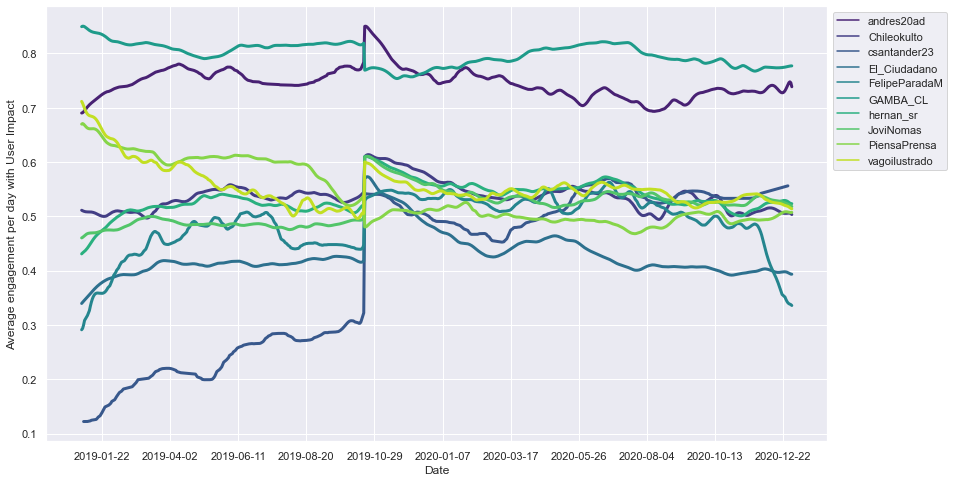

In [52]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=influencers_avg_negative_per_day_df, x ='created_at_day', y = 'EMA:Degree8',
                  hue='user', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average engagement per day with User Impact')
plt.xlabel('Date')
plt.show()

In [53]:
prensa_avg_negative_per_day_df["created_at_day"] = pd.to_datetime(prensa_avg_negative_per_day_df["created_at_day"])
prensa_avg_negative_per_day_df

,created_at_day,tweets_per_day,NEG,average_negative_per_day,EMA,user,zscore,EMA:Degree8
0,2019-01-01,40,11.847085,0.30,0.300000,adnradiochile,-2.764151,0.300111
1,2019-01-02,112,39.411867,0.35,0.300990,adnradiochile,-2.635831,0.300678
2,2019-01-03,146,51.702494,0.35,0.301961,adnradiochile,-2.510052,0.301680
3,2019-01-04,120,38.952511,0.32,0.302318,adnradiochile,-2.463756,0.302775
4,2019-01-05,61,20.473247,0.34,0.303064,adnradiochile,-2.367049,0.303757
...,...,...,...,...,...,...,...,...
6309,2020-12-27,85,35.722286,0.42,0.404533,thecliniccl,-0.903612,0.405300
6310,2020-12-28,212,92.170767,0.43,0.405037,thecliniccl,-0.889637,0.405088
6311,2020-12-29,211,98.916795,0.47,0.406324,thecliniccl,-0.853991,0.404984
6312,2020-12-30,186,70.848559,0.38,0.405802,thecliniccl,-0.868435,0.405082


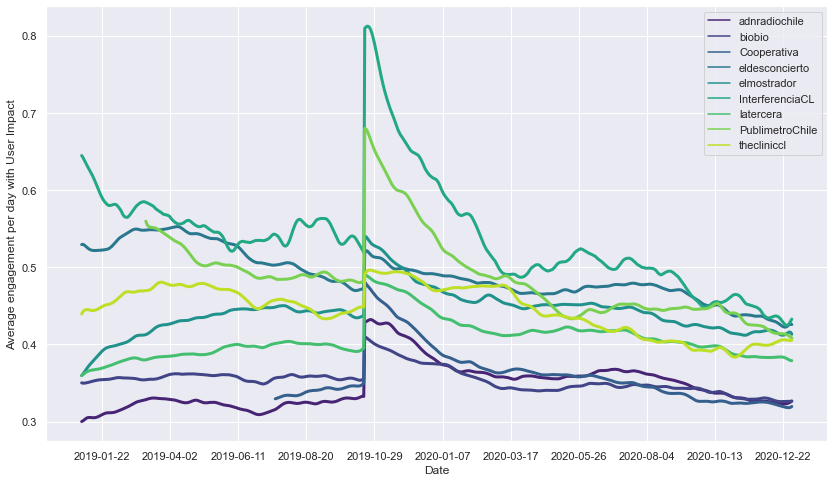

In [54]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=prensa_avg_negative_per_day_df, x ='created_at_day', y = 'EMA:Degree8',
                  hue='user', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average engagement per day with User Impact')
plt.xlabel('Date')
plt.show()

In [55]:
television_avg_negative_per_day_df["created_at_day"] = pd.to_datetime(television_avg_negative_per_day_df["created_at_day"])
television_avg_negative_per_day_df

,created_at_day,tweets_per_day,NEG,average_negative_per_day,EMA,user,zscore,EMA:Degree8
0,2019-01-01,73,23.135659,0.32,0.320000,24HorasTVN,-1.250243,0.319975
1,2019-01-02,171,56.775215,0.33,0.320198,24HorasTVN,-1.208682,0.320159
2,2019-01-03,211,75.514395,0.36,0.320986,24HorasTVN,-1.043261,0.321032
3,2019-01-04,145,51.672935,0.36,0.321759,24HorasTVN,-0.881116,0.322272
4,2019-01-05,99,42.607621,0.43,0.323902,24HorasTVN,-0.431255,0.323644
...,...,...,...,...,...,...,...,...
2686,2020-12-27,129,46.553397,0.36,0.365400,T13,-0.569356,0.366072
2687,2020-12-28,97,36.741287,0.38,0.365689,T13,-0.553036,0.365945
2688,2020-12-29,116,48.484914,0.42,0.366764,T13,-0.492329,0.365992
2689,2020-12-30,121,44.889612,0.37,0.366828,T13,-0.488713,0.366364


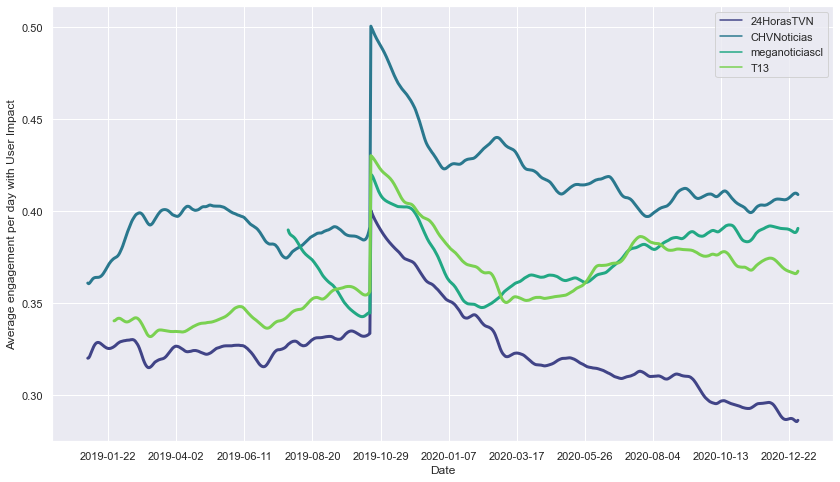

In [56]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=television_avg_negative_per_day_df, x ='created_at_day', y = 'EMA:Degree8',
                  hue='user', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average engagement per day with User Impact')
plt.xlabel('Date')
plt.show()

In [84]:
influencer = influencers_avg_negative_per_day_df[influencers_avg_negative_per_day_df['user'] != 'csantander23'].groupby(['created_at_day']).mean()
influencer['user'] = 'influencers'
influencer['EMA:Degree8'] = savgol_filter(influencer['EMA'], WINDOW_LENGTH, POLY_ORDER)
influencer['created'] = influencer.index
prensa = prensa_avg_negative_per_day_df.groupby(['created_at_day']).mean()
prensa['user'] = 'radio & press'
prensa['created'] = prensa.index
prensa['EMA:Degree8'] = savgol_filter(prensa['EMA'], WINDOW_LENGTH, POLY_ORDER)
television = television_avg_negative_per_day_df.groupby(['created_at_day']).mean()
television['user'] = 'television'
television['created'] = television.index
television['EMA:Degree8'] = savgol_filter(television['EMA'], WINDOW_LENGTH, POLY_ORDER)

grupos = pd.concat([influencer, prensa, television], ignore_index = True)

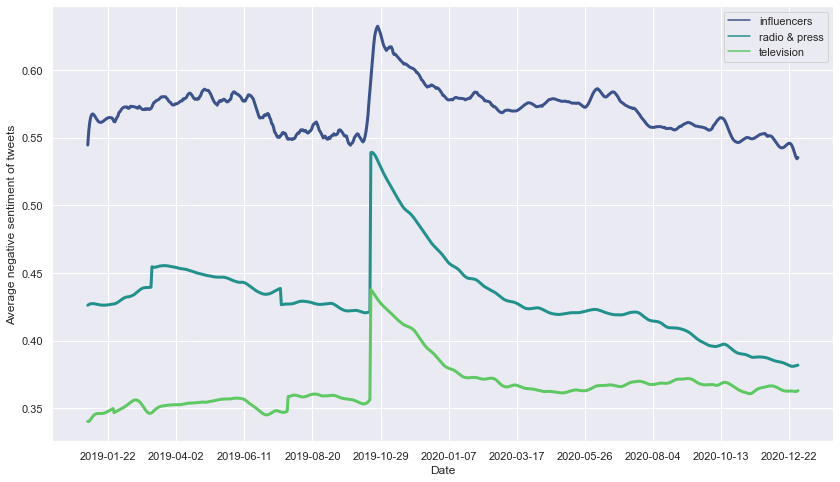

In [87]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=grupos, x ='created', y = 'EMA:Degree8',
                  hue='user', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average negative sentiment of tweets')
plt.xlabel('Date')
plt.show()